In [1]:
import numpy as np
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

np.allclose(res, 1)

True

In [2]:
np.allclose(err, 1 - res)

True

In [3]:
def calc_derivative(ypos, time):
    return -2 * ypos

In [4]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_vec)

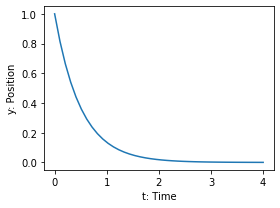

In [6]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

def calc_derivative(ypos, time):
    return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()

In [7]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m


In [8]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [9]:
eps

0.1414213562373095

In [10]:
omega

2.8284271247461903

In [11]:
eps < 1

True

In [12]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -2.0 * eps * omega * yvec[1] - omega **2 * yvec[0])

In [13]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

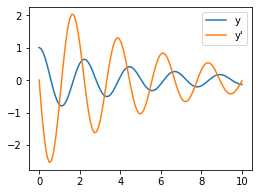

In [14]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m


eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)


def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()